In [ ]:
# Lendo dados de geociência

## License

All content can be freely used and adapted under the terms of the 
[Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)

## Imports

Coloque **todos** os `import` na célula abaixo. Não se esqueça do `%matplotlib inline` para que os gráficos apareçam no notebook.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

## IMPORTANTE

Agora que vocês sabem técnicas de programação defensiva, eu espero que todo o código que vocês fizerem abaixo utilizem essas técnicas. Crie docstrings para suas funções, cheque as entradas (quando for possível) e cheque as saídas. **Não esqueçam dos comentários**.

## Temperatura no Rio de Janeiro

O arquivo `data/23.31S-42.82W-TAVG-Trend.txt` contém dados de temperatura média mensal para a cidade do Rio de Janeiro. O arquivo também contém médias móveis anual, 5, 10 e 20 anos. Esses dados foram baixados do site Berkeley Earth (http://berkeleyearth.lbl.gov/locations/23.31S-42.82W).

### Tarefa

Faça duas funções, uma que lê os dados de temperatura mensal, outra que lê os dados da média móvel anual.
As duas funções devem:

* Receber como entrada **somente** o nome do arquivo de dados.
* Retornar duas listas: uma com as datas referentes aos dados e outra com os dados de temperatura.
* As datas retornadas devem ser em anos decimais. Ex: Janeiro de 1984 seria 1984.0833333333333 (1984 + 1/12).
* Datas sem valores de temperatura (NaN) devem ser ignoradas (não incluidas nas listas).

Utilize suas funções para carregar os dados e fazer um gráfico da temperatura média mensal e média movel anual pelo tempo.

In [7]:
arquivo = 'data/23.31S-42.82W-TAVG-Trend.txt'

In [8]:
def temp_mensal(arquivo):
    """" Recebe com entrada o nome do arquivo, filtra os comentários e linhas em branco e retorna
         duas listas, uma com as datas de forma decimal,
         e a outra com as temperaturas recuperadas a partir das anomalias dadas """
    
    arquivo = open(arquivo)
   
    datas = []
    dados = []
    for linhas in arquivo:
        if linhas[0] != '%':  # Elimina as linhas que possuam comentários
            coluna = linhas.split()
            if len(coluna) != 0:  # Elimina as linhas que não são formatadas em colunas
                if coluna[2] != 'NaN': # Elimina as linhas cuja conuna 2 não contenha dados.
                    
                    ano = float(coluna[0])
                    mes = float(coluna[1])
                    dadostemp  = float(coluna[2])
                    dadosmes = dadostemp + 24.01 # Recupera a temperatura a partir da anomalia.
                    anomensal = ano + (mes/12) # Obtem a data no formato decimal
                    datas.append(anomensal)
                    dados.append(dadosmes) 
    arquivo.close()
    return datas, dados


In [9]:
 # print (temp_mensal(arquivo)[0],temp_mensal(arquivo)[1]) # Impressão usada apena para teste.


In [10]:
def temp_moveis(arquivo):
    """" Recebe com entrada o nome do arquivo, filtra os comentários e linhas em branco e retorna
         duas listas, uma com as datas de forma decimal,
         e a outra com as medias moveis anuais das temperaturas recuperadas a partir das anomalias dadas """
    
    
    
    arquivo = open(arquivo)
    datas = []
    dados_moveis = []
    for linhas in arquivo:
        if linhas[0] != '%':     # Elimina as linhas que possuam comentários
            coluna = linhas.split()
            if len(coluna) != 0:   # Elimina as linhas que não são formatadas em colunas
                if coluna[4] != 'NaN':  # Elimina as linhas cuja coluna 4 não contenha dados.
                    
                    ano = float(coluna[0])
                    mes = float(coluna[1])
                    dadostemp_mediamóvel = float(coluna[4])
                    dadosmes = dadostemp_mediamóvel + 24.01 # Recupera a media móvel anual a partir da anomalia.
                    anomensal = ano + (mes/12) # Obtem a data no formato decimal
                    datas.append(anomensal) #adiciona a média das datas
                    dados_moveis.append(dadosmes) #adiciona a média dos dados
    arquivo.close()
    return datas, dados_moveis

In [11]:
# print (temp_mensal(arquivo)[0],temp_mensal(arquivo)[1]) # Impressão usada apena para teste.

(1832.0833333333333, 2013.6666666666667)

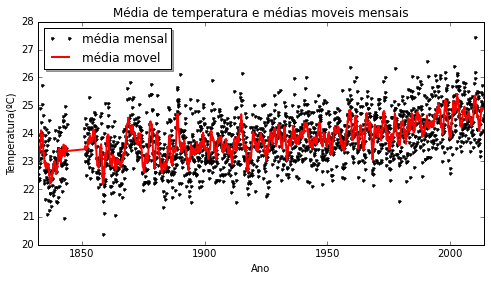

In [25]:
plt.figure(figsize = [8, 4])
plt.plot(temp_mensal(arquivo)[0],temp_mensal(arquivo)[1],'.k', label = 'média mensal')
plt.plot(temp_moveis(arquivo)[0],temp_moveis(arquivo)[1],'r', linewidth = 2 , label = 'média movel') 
#preenchendo as informações para a legenda
plt.legend(loc='upper left', shadow=True, fontsize='large')
plt.title('Média de temperatura e médias moveis mensais') #nomeamos o título
plt.ylabel('Temperatura(ºC)') #nomeamos o eixo Y
plt.xlabel('Ano') #nomeamos o eixo x
plt.xlim(min(temp_mensal(arquivo)[0]), max(temp_mensal(arquivo)[0]))


### Resultado esperado

O gráfico final deve ser parecido com o abaixo:

![images/media-mensal-temp-rio.png](images/media-mensal-temp-rio.png)

### Tarefa

Faça uma função que calcule a temperatura média anual a partir das temperaturas mensais. A sua função deve:

* Receber como entrada a lista das datas e a lista das temperaturas mensais.
* Retornar duas listas: uma com os anos e outra com as temperaturas médias correspondetes.
* Anos que não contem dados de todos os 12 meses devem ser ignorados (não incluídos nas listas retornadas).

Utilize sua função para calcular a média anual. Faça um gráfico da temperatura média anual por ano junto com a média móvel anual.

**Dica**: A função `math.floor` retorna o número inteiro que precede um número real. Ex: `math.floor(1984.23) == 1984`

In [13]:
def temp_media_anual(datas, dados):
    """" Esta função recebe duas listas, uma com as datas decimais, e a outra com as temperatures mensais. 
         Ela lê todos os registros validos de um dado ano, verifica se são 12, e retorna duas listas,
         uma com os anos válidos e a outra com a temperatura média anual """   
    assert len(datas) == len(dados), "listas não compatíveis"
           
    dadas_anuais = []  #cria a lista para os anos importantes
    dados_anuais = [] 
    
    registros = 1
    somatório = dados[0]
    meses = 1
    while registros < len(datas): 
        if math.floor(datas[registros]) == math.floor(datas[registros-1]):
            somatório = somatório + dados[registros]
            meses += 1
            
        else:     
            if meses == 12:
                dadas_anuais.append(math.floor(datas[registros]))  
                dados_anuais.append(round(somatório/12,2))
            
            meses = 1
            somatório = dados[registros]
        registros += 1
       
    return dadas_anuais, dados_anuais    
                
      

In [14]:
# temp_media_anual(temp_mensal(arquivo)[0],temp_mensal(arquivo)[1] )

In [15]:
print(temp_media_anual(temp_mensal(arquivo)[0],temp_mensal(arquivo)[1]) )

([1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 20

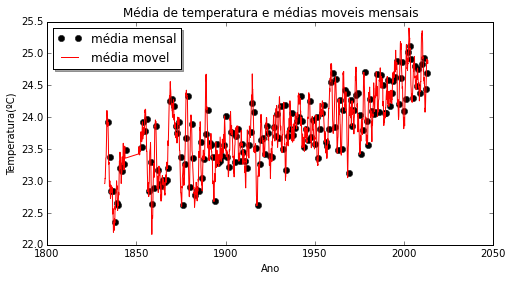

In [26]:
#plotando a figuura, temos
plt.figure(figsize = [8, 4]) #definindo um tamanho para melhor visualização
plt.plot(temp_media_anual(temp_mensal(arquivo)[0],temp_mensal(arquivo)[1])[0], \
         temp_media_anual(temp_mensal(arquivo)[0],temp_mensal(arquivo)[1])[1],'ok',  label = 'média mensal')
plt.plot(temp_moveis(arquivo)[0],temp_moveis(arquivo)[1],'r', linewidth = 1 , label = 'média movel') 

# Criando uma legenda para o nosso gráfico
plt.legend(loc='upper left', shadow=True, fontsize='large')
plt.title('Média de temperatura e médias moveis mensais') #nomeando o título
plt.ylabel('Temperatura(ºC)') #nomeando o eixo y
plt.xlabel('Ano') #nomeando o eixo x
# plt.xlim(min(temp_media_anual(temp_mensal(arquivo)[0],temp_mensal(arquivo)[1])), \
#             max(temp_media_anual(temp_mensal(arquivo)[0],temp_mensal(arquivo)[1])))

### Resultado esperado

O gráfico final deve ser parecido com o abaixo:

![images/media-anual-temp-rio.png](images/media-anual-temp-rio.png)

## Tarefa Bônus

Salve os dados da média anual em um arquivo CSV (comma separated values) chamado `temp-media-anual.csv`. Os valores devem ser separados por `,`. A primeira coluna deve conter os anos e a segunda as temperaturas. Esse arquivo deve estar presente em seu repositório (dê `git add` nele).